<a href="https://colab.research.google.com/github/freakingdark/Nonlinear_Dynamics_Masters_Project/blob/main/n%3D1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**N=1, SINGLE ELEMENT SYSTEM CODE **

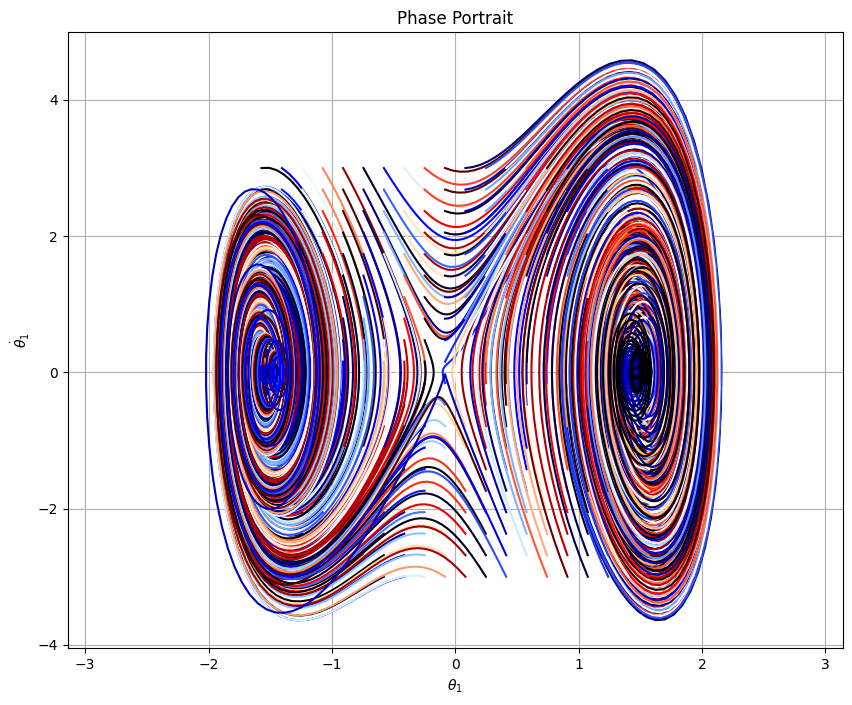

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.colors import LinearSegmentedColormap

# Define the differential equation
def nldpf_eq(y, t, b, g, k1, alpha1, f, omega):
    theta1, theta1_dot = y
    d_theta1_dt = theta1_dot
    d_theta1_dot_dt = (2 * g * np.sin(theta1) - 4 * k1 * theta1 * (1 + alpha1 * theta1**2) + 2 * f * np.cos(omega * t) - b * theta1_dot)
    return [d_theta1_dt, d_theta1_dot_dt]

# Parameters
b = 1  # Modified value
g = 9.8  # Gravitational acceleration
k1 = 1  # Modified value
alpha1 = 1  # Modified value
f = 1  # Modified value
omega = 1  # No external force

# Initial conditions
theta1_range = np.linspace(-np.pi/2, np.pi/2, 20)  # Range of initial angles for theta1
theta1_dot_range = np.linspace(-3, 3, 20)  # Range of initial angular velocities for theta1_dot

# Time points for integration
t = np.linspace(0, 20, 1000)  # Time points from 0 to 20 with 1000 intervals

# Plot the phase portrait for each combination of initial conditions
plt.figure(figsize=(10, 8))
color_map = plt.cm.flag(np.linspace(0, 1, len(theta1_range) * len(theta1_dot_range)))

idx = 0
for theta1_0 in theta1_range:
    for theta1_dot_0 in theta1_dot_range:
        y0 = [theta1_0, theta1_dot_0]
        solution = odeint(nldpf_eq, y0, t, args=(b, g, k1, alpha1, f, omega))
        theta1, theta1_dot = solution.T
        plt.plot(theta1, theta1_dot, color=color_map[idx], alpha=1)
        idx += 1

plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$\dot{\theta}_1$')
plt.title('Phase Portrait')
plt.grid(True)
plt.xlim(-np.pi, np.pi)  # Set x-axis limits
plt.show()

**For different values of parameters**

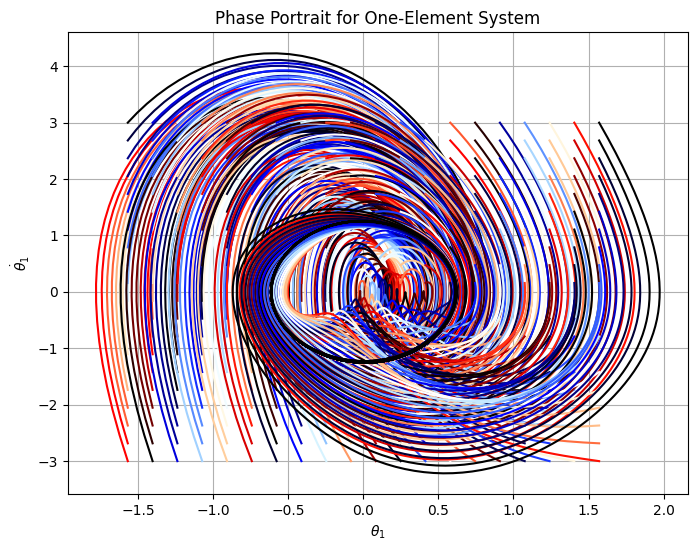

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the differential equation for theta1''
def nldpf_eq(y, t, b, g, k1, alpha1, f, omega):
    theta1, theta1_dot = y

    # Define the equation for theta1''
    theta1_double_dot = (-g*np.sin(theta1) - k1*theta1 - b*theta1_dot + f*np.cos(omega*t))/alpha1

    return [theta1_dot, theta1_double_dot]

# Parameters
b = 2.5  # Damping coefficient
g = 9.8  # Gravitational acceleration
k1 = 1   # Spring constant
alpha1 = 1  # Modified value
f = 5   # Amplitude of external force
omega = 2  # Frequency of external force

# Define the range of initial conditions for theta1 and theta1_dot
theta1_range = np.linspace(-np.pi/2, np.pi/2, 20)         # Range of initial angles for theta1
theta1_dot_range = np.linspace(-3, 3, 20)                 # Range of initial angular velocities for theta1_dot

# Time points for integration
t = np.linspace(0, 20, 1000)  # Time points from 0 to 20 with 1000 intervals

# Plot the phase portrait for each combination of initial conditions
plt.figure(figsize=(8, 6))
color_map = plt.cm.flag(np.linspace(0, 1, len(theta1_range) * len(theta1_dot_range)))

idx = 0
for theta1_0 in theta1_range:
    for theta1_dot_0 in theta1_dot_range:
        y0 = [theta1_0, theta1_dot_0]
        solution = odeint(nldpf_eq, y0, t, args=(b, g, k1, alpha1, f, omega))
        theta1, theta1_dot = solution.T
        plt.plot(theta1, theta1_dot, color=color_map[idx], alpha=1)
        idx += 1

plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$\dot{\theta}_1$')
plt.title('Phase Portrait for One-Element System')
plt.grid(True)
plt.show()
